In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pre_fun import *


In [3]:
# import data

name = '20180603_model_1_impedance_1.sim'

# load setup object
stp = Setup.load_setup( name )

In [4]:
stp.__dict__

{'I': 500,
 'N': 262144,
 'Dt': 0.0001,
 'T': 300,
 'L': 10,
 'lengthscale': 1000000000.0,
 'c0': 0.6022140857,
 'DA': 1.0,
 'DC': 1.0,
 'D0': 100000000.0,
 'epsilon': 1.0,
 'epsilon_m': 80.0,
 'testname': '20180603_model_1_impedance_1',
 'kA': 0.001,
 'kC': 0.001,
 'foxA': 0.0005,
 'foxC': 0.0005,
 'sim_method': 'c_only_imp',
 'phi0': 0.025851991011651636,
 'chi2': 526.9004702828952,
 'chi1': 1.0,
 'T0': 1e-06,
 'f0': 6022140.857000001,
 'model': 1,
 'steady_state_tol': 5e-07,
 'current_data': array([[      0.        ,       0.        ,  170345.74785558, ...,
           63558.25701856,  -66095.11747411,   93642.39968947],
        [      0.        ,       0.        , -170345.64665147, ...,
          -63555.49440145,   66097.88862728,  -93639.66929999]]),
 'simulation_date': '2018-06-03',
 'input_voltage_data': array([ 0.        ,  4.29874304,  3.2374802 , ..., -3.94534257,
        -3.2374802 , -4.29874304])}

In [19]:
# calculate FFT

Fvoltage = np.fft.fft(stp.input_voltage_data)[1:int(stp.N/2)]
freq_ax1 = np.fft.fftfreq(stp.N, d = stp.Dt)[1:int(stp.N/2)] / stp.T0

# anodic current
Fcurrent_A = np.fft.fft(stp.current_data[0,:])[1:int(stp.N/2)]

# catodic current
Fcurrent_C = np.fft.fft(stp.current_data[1,:])[1:int(stp.N/2)]

# calculate Impedance

# from anodic current and catodic current
ZA = Fvoltage / Fcurrent_A
ZC = Fvoltage / Fcurrent_C

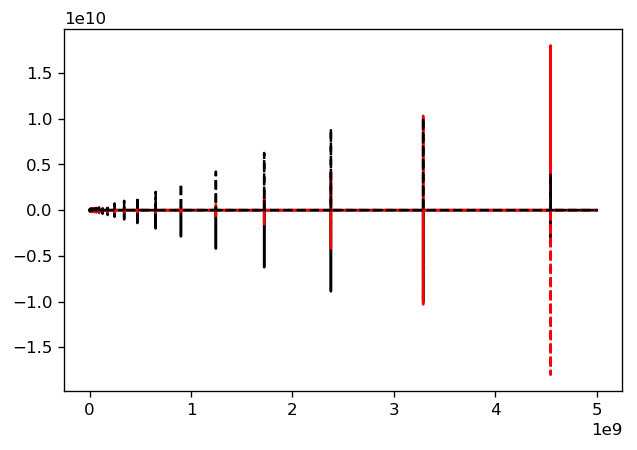

In [10]:
fig = plt.figure(dpi = 120)

ax = fig.add_subplot(1,1,1)

#ax.plot(freq_ax1, Fvoltage1.imag)

# anodic
ax.plot(freq_ax1, Fcurrent_A.imag, color = "red")
ax.plot(freq_ax1, Fcurrent_A.real, color = "black")

# catodic
ax.plot(freq_ax1, Fcurrent_C.imag, color = "red", ls = '--')
ax.plot(freq_ax1, Fcurrent_C.real, color = "black", ls = '--')

plt.show()

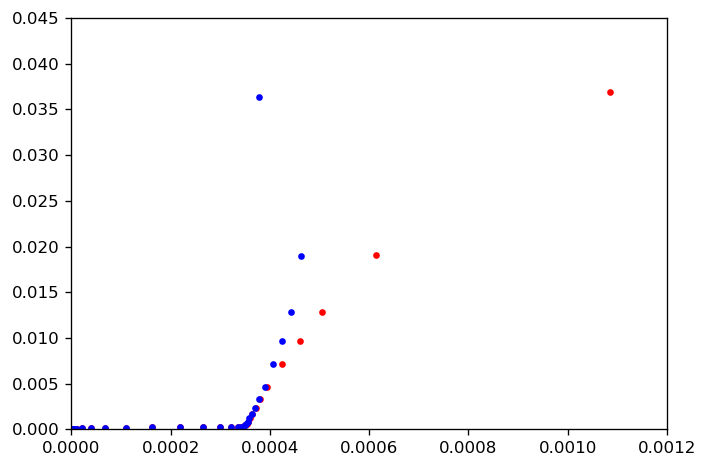

In [33]:


# Nyquist plot
fig = plt.figure(dpi = 120)

ax = fig.add_subplot(1,1,1)

ax.plot(np.abs(ZA.real), np.abs(ZA.imag), marker = ".", ls = "None", color = 'red')
ax.plot(np.abs(ZC.real), np.abs(ZC.imag), marker = ".", ls = "None", color = 'blue')


#
ax.set_xlim([0,0.0012])
ax.set_ylim([0,0.045])
# ax.set_xlim([-1e-5,0.0002])

# ax.set_xscale("log")

fig.tight_layout()

plt.show()

# # Bode plot
# fig = plt.figure(dpi = 120)

# ax = fig.add_subplot(1,1,1)

# ax.plot(Dt, np.absolute(Z1), marker = ".", ls = "None")

# fig.tight_layout()

# ax.set_xscale("log")
# ax.set_yscale("log")

# plt.show()

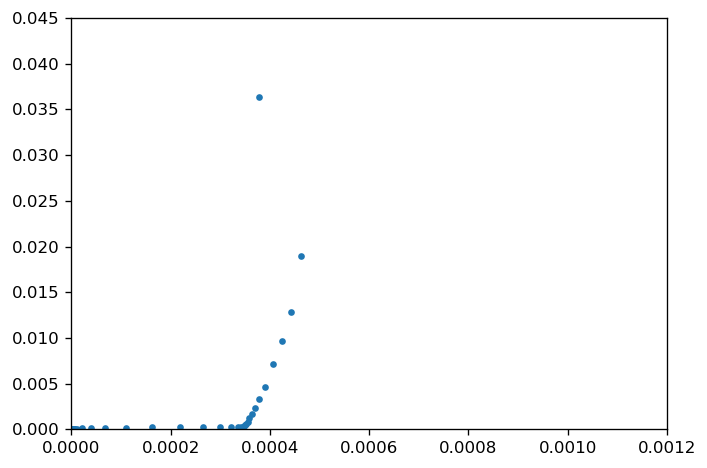

In [31]:
# Nyquist plot
fig = plt.figure(dpi = 120)

ax = fig.add_subplot(1,1,1)

ax.plot(np.abs(ZC.real), np.abs(ZC.imag), marker = ".", ls = "None")

#
ax.set_xlim([0,0.0012])
ax.set_ylim([0,0.045])

fig.tight_layout()

plt.show()